In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set(rc={'figure.figsize':(12,6)})

In [2]:
df = pd.read_csv("US_Accidents_June20.csv")

In [3]:
df.shape

(3513617, 49)

In [4]:
df.columns = map(str.lower, df.columns)
df.head()

,id,source,tmc,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,...,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("The dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [6]:
missing_values_table(df)

The dataframe has 49 columns.
There are 23 columns that have missing values.


,Missing Values,% of Total Values
end_lat,2478818,70.5
end_lng,2478818,70.5
number,2262864,64.4
precipitation(in),2025874,57.7
wind_chill(f),1868249,53.2
tmc,1034799,29.5
wind_speed(mph),454609,12.9
weather_condition,76138,2.2
visibility(mi),75856,2.2
humidity(%),69687,2.0


In [7]:
df.drop(['end_lat', 'end_lng', 'number', 'tmc','nautical_twilight','civil_twilight','astronomical_twilight',"timezone","airport_code","precipitation(in)","wind_chill(f)"], axis=1, inplace=True)
df = df.dropna(subset=['description','city','sunrise_sunset','zipcode','weather_timestamp'])
missing_values_table(df)

The dataframe has 38 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
wind_speed(mph),411273,11.9
weather_condition,32810,0.9
visibility(mi),32530,0.9
humidity(%),26361,0.8
temperature(f),22406,0.6
wind_direction,15551,0.4
pressure(in),12555,0.4


In [8]:
df.to_csv('US_accidents_clean.csv')

In [9]:
df.describe(include='O').T

,count,unique,top,freq
id,3470179,3470179,A-543105,1
source,3470179,3,MapQuest,2387488
start_time,3470179,3163541,2017-05-15 09:22:55,74
end_time,3470179,3208251,2017-05-15 15:22:55,73
description,3470179,1761207,At I-15 - Accident.,2084
street,3470179,174877,I-5 N,41130
side,3470179,3,R,2844099
city,3470179,11781,Houston,99177
county,3470179,1717,Los Angeles,264515
state,3470179,49,CA,804282


In [ ]:
df.drop(["country","county","street"], axis=1, inplace=True)

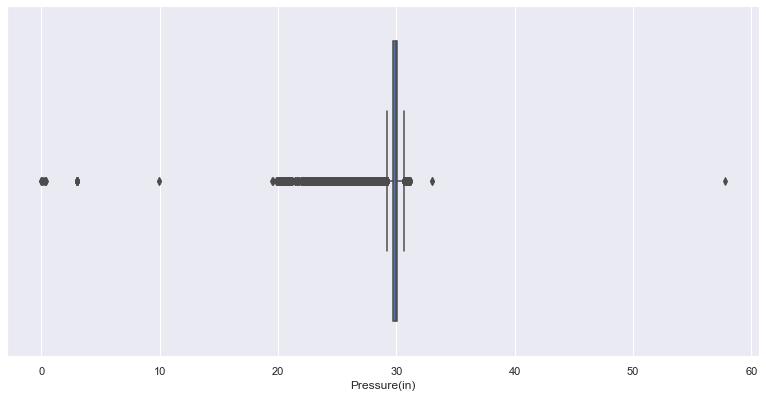

In [32]:
sns.boxplot(data=df,x="Pressure(in)",hue="Severity")